# LAB 11- PCA, SVM & Evaluation Metrics
 
SHOBHITH VADLAMUDI ED21B069 <br/>
 14/4/23

Use the weblink and reproduce the result for SVM. <br/>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html <br/>
1. Implement SVM to classify the type of iris flower based on its sepal length and width using the iris dataset? 
2. Also try to use the scikit-learn digits dataset and an SVM to classify handwritten digits? 
For both datasets, provide a step-by-step code, including:  

- Loading the dataset 
- Visualizing the data 
- Splitting the data into training and testing sets 
- Initializing and training the SVM model 
- Testing the model 

Additionally, without using libraries (implement from scratch)

- Use Precision, Recall, F-1 Score, and accuracy on test data to evaluate the performance of the SVM model.
- Plot confusion matrix for test data


Loading the Dataset: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
# This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray
# The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width



In [2]:

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Visualizing the data:

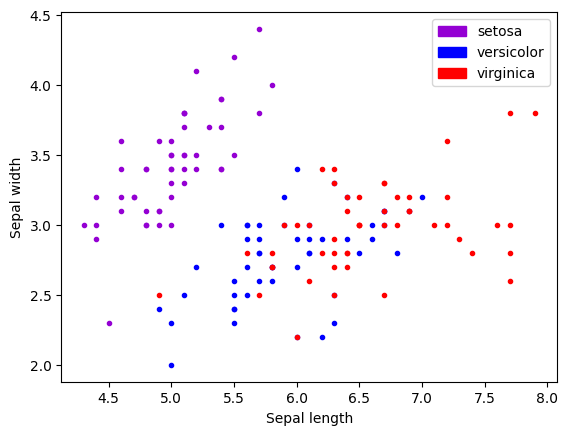

In [3]:
X=iris.data[:,:2]
y=iris.target
for i in range(len(y)):

    if y[i] == 0:
        plt.plot(X[i][0], X[i][1],'.',color='darkviolet')
    elif y[i]==1:
        plt.plot(X[i][0], X[i][1],'.',color='blue')
    else:
        plt.plot(X[i][0], X[i][1],'.',color='red')

import matplotlib.patches as mpatches
s_patch = mpatches.Patch(color='darkviolet', label='setosa')
v_patch = mpatches.Patch(color='blue', label='versicolor')
vir_patch = mpatches.Patch(color='red', label='virginica')
plt.legend(handles=[s_patch,v_patch,vir_patch])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()


Splitting the data into training and testing sets: 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=100)

Initializing and training the SVM model 

In [5]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)


SVC(kernel='linear')

Testing the model 

In [6]:
y_pred = clf.predict(X_test)

In [7]:
print(y_pred)
print(y_test)

[1 0 2 0 1 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 1 0 1 1 2 0 1 2 1 1 1 0 0 2 0
 1 2 1 1 1 2 2 0]
[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 1 2 2 2 0 2 0 1 2 1 0 1 2 1 1 2 0 0 1 0
 1 2 2 0 1 2 2 0]


- Use Precision, Recall, F-1 Score, and accuracy on test data to evaluate the performance of the SVM model.
- Plot confusion matrix for test data

In [8]:
def confusion_matrix(pred,original): 
    matrix=np.zeros((3,3)) 
    for i in range(len(pred)): 
        for j in range(3):
            for k in range(3):
                if int(pred[i])==k and int(original[i])==j: 
                   matrix[j,k]+=1 
    precision_0=matrix[0,0]/(matrix[0,0]+matrix[1,0]+matrix[2,0])
    precision_1=matrix[1,1]/(matrix[0,1]+matrix[1,1]+matrix[2,1])
    precision_2=matrix[2,2]/(matrix[0,2]+matrix[1,2]+matrix[2,2])
    recall_0=matrix[0,0]/(matrix[0,0]+matrix[0,1]+matrix[0,2])
    recall_1=matrix[1,1]/(matrix[1,0]+matrix[1,1]+matrix[1,2])
    recall_2=matrix[2,2]/(matrix[2,0]+matrix[2,1]+matrix[2,2])
    print("Precision for setosa:",precision_0)
    print("Precision for versicolor:",precision_1)
    print("Precision for virginica:",precision_2)
    print("Recall for setosa:",recall_0)
    print("Recall for versicolor:",recall_1)
    print("Recall for virginica:",recall_2)
    f1_0=2*(precision_0*recall_0)/(precision_0+recall_0)
    print("F1 score for setosa:",f1_0)
    f1_1=2*(precision_1*recall_1)/(precision_1+recall_1)
    print("F1 score for versicolor:",f1_1)
    f1_2=2*(precision_2*recall_2)/(precision_2+recall_2)
    print("F1 score for virginica:",f1_2)
    accuracy_0=(matrix[0,0]+matrix[1,1]+matrix[1,2]+matrix[2,1]+matrix[2,2])/(matrix[0,0]+matrix[1,1]+matrix[1,2]+matrix[2,1]+matrix[2,2]+matrix[0,1]+matrix[0,2]+matrix[1,0]+matrix[2,0])
    accuracy_1=(matrix[1,1]+matrix[0,0]+matrix[2,0]+matrix[0,2]+matrix[2,2])/(matrix[1,1]+matrix[0,0]+matrix[2,0]+matrix[0,2]+matrix[2,2]+matrix[0,1]+matrix[2,1]+matrix[1,0]+matrix[1,2])
    accuracy_2=(matrix[2,2]+matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1])/(matrix[2,2]+matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1]+matrix[0,2]+matrix[1,2]+matrix[2,0]+matrix[2,1])
    print("Accuracy score for setosa: ",accuracy_0)
    print("Accuracy score for versicolor: ",accuracy_1)
    print("Accuracy score for virginica: ",accuracy_2)
    return matrix

Precision for setosa: 1.0
Precision for versicolor: 0.5333333333333333
Precision for virginica: 0.8
Recall for setosa: 0.9375
Recall for versicolor: 0.7272727272727273
Recall for virginica: 0.6666666666666666
F1 score for setosa: 0.967741935483871
F1 score for versicolor: 0.6153846153846153
F1 score for virginica: 0.7272727272727272
Accuracy score for setosa:  0.9777777777777777
Accuracy score for versicolor:  0.7777777777777778
Accuracy score for virginica:  0.8
[[15.  1.  0.]
 [ 0.  8.  3.]
 [ 0.  6. 12.]]


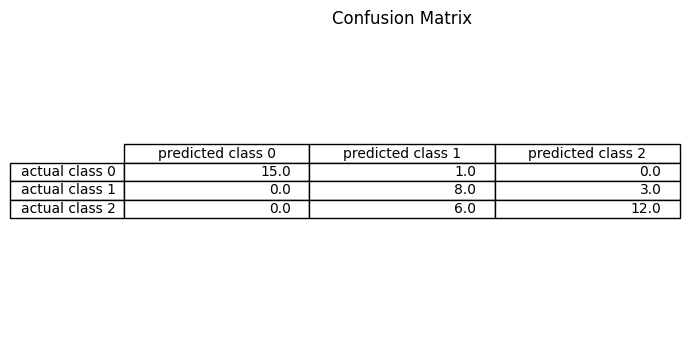

In [9]:
a1=confusion_matrix(y_pred,y_test)
print(a1)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1, 1)
data = a1
columns = ("predicted class 0", "predicted class 1", "predicted class 2")
rows=('actual class 0','actual class 1','actual class 2')
axs.axis('tight')
axs.set_xlabel="Actual Values"
axs.set_ylabel='Predicted Values'
axs.axis('off')
plt.title("Confusion Matrix")
the_table = axs.table(cellText=data, colLabels=columns,rowLabels=rows, loc='center')
plt.show()

# For scikit-learn digits dataset 

Loading the dataset

In [10]:
digits = datasets.load_digits()


Visualizing the data

In [11]:
X1=digits.data
y1=digits.target
print(y1)
print(X1)

[0 1 2 ... 8 9 8]
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


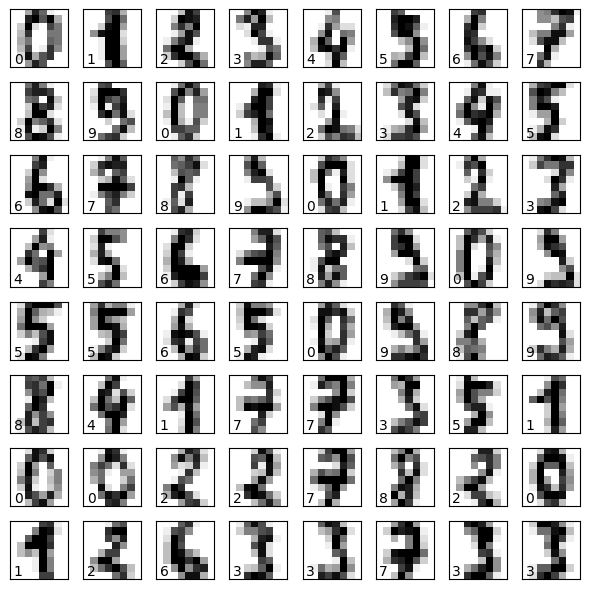

In [12]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Splitting the dataset into test and train

In [13]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3,random_state=100)

Initializing and training the SVM model

In [14]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X1_train, y1_train)

SVC(kernel='linear')

Testing the model

In [15]:
y1_pred = clf.predict(X1_test)
print(y1_test)
print(y1_pred)

[9 9 0 2 4 5 7 4 7 2 4 5 7 5 9 6 1 1 5 2 8 7 6 6 6 7 0 2 8 3 0 9 3 9 5 5 3
 6 3 6 1 1 5 2 0 4 8 3 7 4 1 5 5 1 4 8 8 7 3 9 6 3 5 4 2 6 3 6 6 6 8 4 6 0
 6 6 2 1 6 3 1 3 3 1 1 4 0 5 5 4 1 7 0 0 8 7 4 2 7 5 4 0 9 3 4 5 7 2 5 5 5
 2 1 3 2 0 1 4 7 3 2 1 9 6 0 7 0 7 5 0 7 6 0 2 8 2 0 7 6 3 4 5 0 3 9 0 8 0
 3 6 8 1 4 1 8 9 0 0 6 2 2 7 5 9 2 4 1 5 3 4 2 0 6 9 3 1 0 0 7 4 4 4 3 9 5
 3 4 9 2 8 2 4 4 7 2 7 1 0 8 3 8 6 9 9 0 3 1 5 3 8 0 6 8 6 2 9 9 2 6 2 1 4
 4 2 8 0 7 2 7 2 6 4 0 9 0 5 0 3 3 9 0 2 7 0 1 2 2 7 3 2 0 2 2 5 1 2 6 7 0
 5 9 3 5 2 2 6 4 7 9 4 0 9 0 8 7 0 9 1 0 7 1 6 0 5 9 9 6 8 7 4 2 7 1 0 6 1
 9 6 1 8 7 9 9 7 9 2 1 5 2 5 9 6 1 2 9 0 7 3 0 7 8 4 5 8 4 7 8 4 5 6 6 9 5
 4 5 8 6 1 7 3 9 7 8 1 7 8 4 9 2 5 8 6 6 3 6 4 9 6 7 3 9 4 4 1 6 2 2 8 8 3
 5 8 4 1 6 4 8 9 7 4 5 8 5 4 1 3 2 9 7 3 4 9 3 5 3 4 2 9 1 8 8 5 1 8 0 8 8
 4 6 2 5 4 4 9 2 4 9 2 2 0 7 7 7 2 4 0 8 3 8 0 5 9 8 4 0 6 6 0 8 4 2 5 0 3
 6 6 4 4 9 4 2 6 1 4 1 5 7 1 6 5 1 3 7 0 5 3 1 9 6 2 0 1 5 2 1 1 0 0 7 8 3
 6 0 8 3 6 1 8 7 7 1 5 3 

- Use Precision, Recall, F-1 Score, and accuracy on test data to evaluate the performance of the SVM model.
- Plot confusion matrix for test data

In [16]:
def confusion_matrix_1(pred,original): 
    matrix=np.zeros((10,10)) 
    for i in range(len(pred)): 
        for j in range(10):
          for k in range(10): 
           if int(pred[i])==k and int(original[i])==j: 
             matrix[j,k]+=1 
        
    
    return matrix

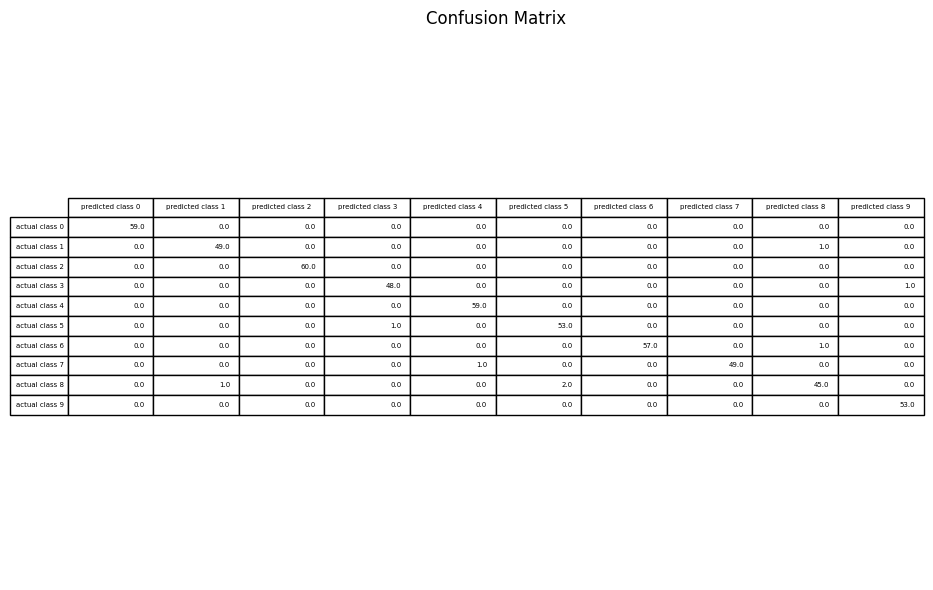

In [17]:
a=confusion_matrix_1(y1_pred,y1_test)
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1, 1)
data = a
columns = ("predicted class 0","predicted class 1", "predicted class 2", "predicted class 3",'predicted class 4','predicted class 5','predicted class 6','predicted class 7','predicted class 8','predicted class 9')
rows=('actual class 0','actual class 1','actual class 2','actual class 3','actual class 4','actual class 5','actual class 6','actual class 7','actual class 8','actual class 9')
axs.axis('tight')
axs.set_xlabel="Actual Values"
axs.set_ylabel='Predicted Values'
axs.axis('off')
plt.title("Confusion Matrix")
the_table = axs.table(cellText=data, colLabels=columns,rowLabels=rows, loc='center')
plt.show()

In [18]:
b=np.sum(a,axis=0)
c=np.sum(a,axis=1)
for i in range(10):
    print(f"Precision of class {i}= {a[i,i]/b[i]}")
    print(f"Recall of class {i}= {a[i,i]/c[i]}")
    print(f"F-1 score of class {i}= {2*(a[i,i]/b[i])*(a[i,i]/c[i])/((a[i,i]/b[i])+(a[i,i]/c[i]))}")
    
print(f"Accuracy of the model= {(np.sum(np.diag(a)))/np.sum(a)} ")

Precision of class 0= 1.0
Recall of class 0= 1.0
F-1 score of class 0= 1.0
Precision of class 1= 0.98
Recall of class 1= 0.98
F-1 score of class 1= 0.98
Precision of class 2= 1.0
Recall of class 2= 1.0
F-1 score of class 2= 1.0
Precision of class 3= 0.9795918367346939
Recall of class 3= 0.9795918367346939
F-1 score of class 3= 0.9795918367346939
Precision of class 4= 0.9833333333333333
Recall of class 4= 1.0
F-1 score of class 4= 0.9915966386554621
Precision of class 5= 0.9636363636363636
Recall of class 5= 0.9814814814814815
F-1 score of class 5= 0.9724770642201834
Precision of class 6= 1.0
Recall of class 6= 0.9827586206896551
F-1 score of class 6= 0.9913043478260869
Precision of class 7= 1.0
Recall of class 7= 0.98
F-1 score of class 7= 0.98989898989899
Precision of class 8= 0.9574468085106383
Recall of class 8= 0.9375
F-1 score of class 8= 0.9473684210526315
Precision of class 9= 0.9814814814814815
Recall of class 9= 1.0
F-1 score of class 9= 0.9906542056074767
Accuracy of the mode

# Q.2 
Principal Component Analysis:

- To do PCA, use the Eigen decomposition available in numpy. The dataset can be obtained from https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py. 
- DO NOT USE the code available for PCA in the same link (as mentioned above, use numpy's Eigen decomposition). 
- Compare your results with the one available in the link (here, you are free to use the code available in the link to generate any numbers for comparison). 
- Are you getting the same result?


In [19]:
class PCA:
    def __init__(self,n_components=3):
        self.n_components=n_components
      
    def fit(self,X):
        self.mean=np.mean(X,axis=0)
        X=X-self.mean
        covar=np.cov(X)
        eigval,eigvec=np.linalg.eig(covar)
        print("The eigen values are: ",eigval)
        print(f"The eigen vectors are {eigvec}")
        idxs=np.argsort(eigval)[::-1]
        eigval=eigval[idxs]
        eigvec=eigvec[:,idxs]
        self.n_components=eigvec[:,0:self.n_components]
        return eigvec
    def transform(self,X):
        X=X-self.mean
        return np.dot(self.n_components.T,X)

Create the data

In [20]:
from scipy import stats

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))


y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm


Using eigen decomposition

In [21]:
X2=np.array([a,b,c])
pca=PCA()
pca.fit(X2)
x_new=pca.transform(X2)
print(x_new.shape)
 


The eigen values are:  [ 1.01296517e+00  3.80183595e-02 -1.94160085e-16]
The eigen vectors are [[-0.12244132 -0.80726377  0.57735027]
 [-0.63789027  0.50966918  0.57735027]
 [ 0.76033159  0.29759459  0.57735027]]
(3, 30000)


Using code given

Eigen Vectors for fig1:
[[-0.33847725 -0.7109608   0.61641536]
 [-0.77400604 -0.1621726  -0.61205775]
 [ 0.53511475 -0.68427684 -0.49539622]]

Eigen Vectors for fig2:
[[-0.33847725 -0.7109608   0.61641536]
 [-0.77400604 -0.1621726  -0.61205775]
 [ 0.53511475 -0.68427684 -0.49539622]]



C:\Users\Shobhith Vadlamudi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


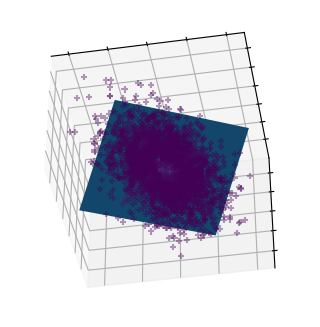

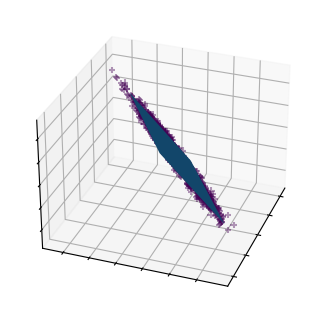

In [22]:
from sklearn.decomposition import PCA
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = fig.add_subplot(111, projection="3d", elev=elev, azim=azim)
    ax.set_position([0, 0, 0.95, 1])

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker="+", alpha=0.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, Vt = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    V = pca.components_.T
    V0=np.array(V)
    print(f"Eigen Vectors for fig{fig_num}:\n{V}\n")
    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])

    return V


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()

No I'm not getting the same eigen vectors. 